<a href="https://colab.research.google.com/github/htanerunal/breast_cancer/blob/master/breast_cancer_ML_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [0]:
# Load Dataset from Jetkite.AI Server
from urllib.request import urlopen
from numpy import loadtxt
url = 'http://www.jetkite.com/ai/data/breast_cancer_data.csv'
data=pd.read_csv(url)

In [5]:
# Delete ID column and 32nd column
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Normalize data using StandardScaler
data = data.values
x = data[ : , 1:]
y = data[ : , 0]
print(x.shape, y.shape)
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

(569, 30) (569,)


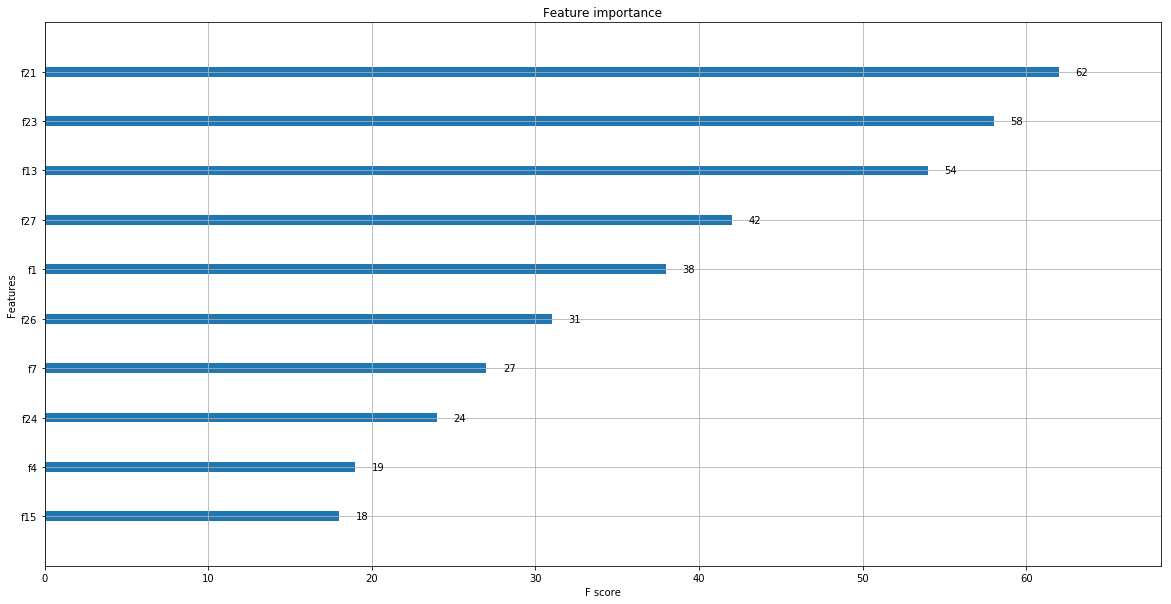

In [7]:
# Feature Importance Table using XGBoost 
from xgboost import plot_importance
xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(x, y)
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(xgbmodel, ax=ax, max_num_features=10)
fig.savefig('Feature Importance.png',dpi=300)

In [8]:
# Logistic Regression

import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
names = []
meanaccs = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('LR')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9459    0.9722    0.9589        36
           M     0.9524    0.9091    0.9302        22

    accuracy                         0.9483        58
   macro avg     0.9492    0.9407    0.9446        58
weighted avg     0.9484    0.9483    0.9480        58

------------------------------------------------------------Fold:2
[[36  0]
 [ 0 22]]
              precision    recall  f1-score   support

           B     1.0000    1.0000    1.0000        36
           M     1.0000    1.0000    1.0000        22

    accuracy                         1.0000        58
   macro avg     1.0000    1.0000    1.0000        58
weighted avg     1.0000    1.0000    1.0000        58

------------------------------------------------------------Fold:3
[[36  0]
 [ 2 19]]
              precision    recall  f1-score   support

           B     0.9474    1.0000

In [9]:
# K-Nearest Neighbors (KNN)

import warnings
warnings.filterwarnings('ignore')

model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('KNN')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 3 19]]
              precision    recall  f1-score   support

           B     0.9211    0.9722    0.9459        36
           M     0.9500    0.8636    0.9048        22

    accuracy                         0.9310        58
   macro avg     0.9355    0.9179    0.9254        58
weighted avg     0.9320    0.9310    0.9303        58

------------------------------------------------------------Fold:2
[[36  0]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9730    1.0000    0.9863        36
           M     1.0000    0.9545    0.9767        22

    accuracy                         0.9828        58
   macro avg     0.9865    0.9773    0.9815        58
weighted avg     0.9832    0.9828    0.9827        58

------------------------------------------------------------Fold:3
[[35  1]
 [ 1 20]]
              precision    recall  f1-score   support

           B     0.9722    0.9722

In [10]:
# Decision Tree Classifier (CART)

import warnings
warnings.filterwarnings('ignore')

model = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('CART')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[33  3]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9429    0.9167    0.9296        36
           M     0.8696    0.9091    0.8889        22

    accuracy                         0.9138        58
   macro avg     0.9062    0.9129    0.9092        58
weighted avg     0.9151    0.9138    0.9141        58

------------------------------------------------------------Fold:2
[[34  2]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9714    0.9444    0.9577        36
           M     0.9130    0.9545    0.9333        22

    accuracy                         0.9483        58
   macro avg     0.9422    0.9495    0.9455        58
weighted avg     0.9493    0.9483    0.9485        58

------------------------------------------------------------Fold:3
[[33  3]
 [ 2 19]]
              precision    recall  f1-score   support

           B     0.9429    0.9167

In [11]:
# Naive Bayes

import warnings
warnings.filterwarnings('ignore')

model = GaussianNB()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('NB')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[34  2]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9444    0.9444    0.9444        36
           M     0.9091    0.9091    0.9091        22

    accuracy                         0.9310        58
   macro avg     0.9268    0.9268    0.9268        58
weighted avg     0.9310    0.9310    0.9310        58

------------------------------------------------------------Fold:2
[[34  2]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9444    0.9444    0.9444        36
           M     0.9091    0.9091    0.9091        22

    accuracy                         0.9310        58
   macro avg     0.9268    0.9268    0.9268        58
weighted avg     0.9310    0.9310    0.9310        58

------------------------------------------------------------Fold:3
[[33  3]
 [ 2 19]]
              precision    recall  f1-score   support

           B     0.9429    0.9167

In [13]:
# Support Vector Machines

import warnings
warnings.filterwarnings('ignore')

model = SVC()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
# create model
    i+=1
    # Fit the model
    model.fit(rescaledX[train], y[train])    
    # evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 
print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('SVM')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9722    0.9722    0.9722        36
           M     0.9545    0.9545    0.9545        22

    accuracy                         0.9655        58
   macro avg     0.9634    0.9634    0.9634        58
weighted avg     0.9655    0.9655    0.9655        58

------------------------------------------------------------Fold:2
[[36  0]
 [ 0 22]]
              precision    recall  f1-score   support

           B     1.0000    1.0000    1.0000        36
           M     1.0000    1.0000    1.0000        22

    accuracy                         1.0000        58
   macro avg     1.0000    1.0000    1.0000        58
weighted avg     1.0000    1.0000    1.0000        58

------------------------------------------------------------Fold:3
[[35  1]
 [ 1 20]]
              precision    recall  f1-score   support

           B     0.9722    0.9722

In [14]:
# Adaboost Classifier (ADB)

import warnings
warnings.filterwarnings('ignore')

model = AdaBoostClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('ADB')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9459    0.9722    0.9589        36
           M     0.9524    0.9091    0.9302        22

    accuracy                         0.9483        58
   macro avg     0.9492    0.9407    0.9446        58
weighted avg     0.9484    0.9483    0.9480        58

------------------------------------------------------------Fold:2
[[35  1]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9722    0.9722    0.9722        36
           M     0.9545    0.9545    0.9545        22

    accuracy                         0.9655        58
   macro avg     0.9634    0.9634    0.9634        58
weighted avg     0.9655    0.9655    0.9655        58

------------------------------------------------------------Fold:3
[[35  1]
 [ 2 19]]
              precision    recall  f1-score   support

           B     0.9459    0.9722

In [15]:
# Gradient Boosting Classifier (GRAD)

import warnings
warnings.filterwarnings('ignore')

model = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('GRAD')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9722    0.9722    0.9722        36
           M     0.9545    0.9545    0.9545        22

    accuracy                         0.9655        58
   macro avg     0.9634    0.9634    0.9634        58
weighted avg     0.9655    0.9655    0.9655        58

------------------------------------------------------------Fold:2
[[34  2]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9714    0.9444    0.9577        36
           M     0.9130    0.9545    0.9333        22

    accuracy                         0.9483        58
   macro avg     0.9422    0.9495    0.9455        58
weighted avg     0.9493    0.9483    0.9485        58

------------------------------------------------------------Fold:3
[[36  0]
 [ 1 20]]
              precision    recall  f1-score   support

           B     0.9730    1.0000

In [16]:
# Random Forest Classifier (RF)

import warnings
warnings.filterwarnings('ignore')

model = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('RF')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[33  3]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9706    0.9167    0.9429        36
           M     0.8750    0.9545    0.9130        22

    accuracy                         0.9310        58
   macro avg     0.9228    0.9356    0.9280        58
weighted avg     0.9343    0.9310    0.9315        58

------------------------------------------------------------Fold:2
[[35  1]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9459    0.9722    0.9589        36
           M     0.9524    0.9091    0.9302        22

    accuracy                         0.9483        58
   macro avg     0.9492    0.9407    0.9446        58
weighted avg     0.9484    0.9483    0.9480        58

------------------------------------------------------------Fold:3
[[33  3]
 [ 0 21]]
              precision    recall  f1-score   support

           B     1.0000    0.9167

In [17]:
# Extreme Gradient Boosting (XGB)

import warnings
warnings.filterwarnings('ignore')

model = xgb.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('XGB')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9722    0.9722    0.9722        36
           M     0.9545    0.9545    0.9545        22

    accuracy                         0.9655        58
   macro avg     0.9634    0.9634    0.9634        58
weighted avg     0.9655    0.9655    0.9655        58

------------------------------------------------------------Fold:2
[[34  2]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9714    0.9444    0.9577        36
           M     0.9130    0.9545    0.9333        22

    accuracy                         0.9483        58
   macro avg     0.9422    0.9495    0.9455        58
weighted avg     0.9493    0.9483    0.9485        58

------------------------------------------------------------Fold:3
[[36  0]
 [ 1 20]]
              precision    recall  f1-score   support

           B     0.9730    1.0000

In [18]:
# Multilayer Perceptron Classifier (MLP)

import warnings
warnings.filterwarnings('ignore')

model = MLPClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
i=0
for train, test in kfold.split(rescaledX, y):
  # create model
    i+=1
	# Fit the model
    model.fit(rescaledX[train], y[train])    
	# evaluate the model
    print("------------------------------------------------------------Fold:"+str(i))
    pred = model.predict(rescaledX[test])      
    print(confusion_matrix(y[test],pred))
    cvscores.append(accuracy_score(y[test], pred))
    cr = classification_report(y[test], pred, digits=4)
    print(cr) 

print('MEAN ACC, STD')
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
names.append('MLP')
meanaccs.append(np.mean(cvscores))

------------------------------------------------------------Fold:1
[[35  1]
 [ 2 20]]
              precision    recall  f1-score   support

           B     0.9459    0.9722    0.9589        36
           M     0.9524    0.9091    0.9302        22

    accuracy                         0.9483        58
   macro avg     0.9492    0.9407    0.9446        58
weighted avg     0.9484    0.9483    0.9480        58

------------------------------------------------------------Fold:2
[[36  0]
 [ 1 21]]
              precision    recall  f1-score   support

           B     0.9730    1.0000    0.9863        36
           M     1.0000    0.9545    0.9767        22

    accuracy                         0.9828        58
   macro avg     0.9865    0.9773    0.9815        58
weighted avg     0.9832    0.9828    0.9827        58

------------------------------------------------------------Fold:3
[[36  0]
 [ 1 20]]
              precision    recall  f1-score   support

           B     0.9730    1.0000

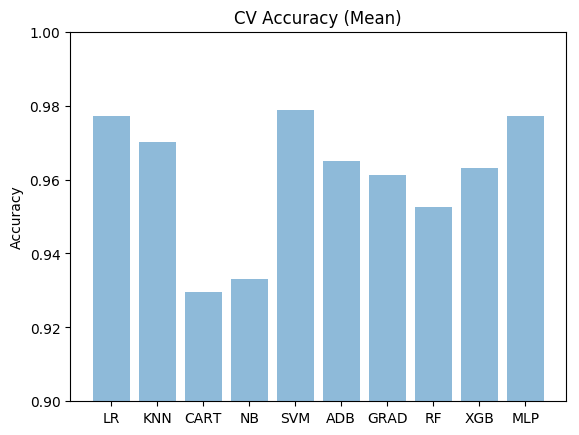

In [23]:
# Plot Comparison
import math
plt.rcdefaults()

y_pos = np.arange(len(names))

plt.ylim(0.9, 1.0)
plt.bar(y_pos, meanaccs, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
plt.title('CV Accuracy (Mean)')

plt.show()

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

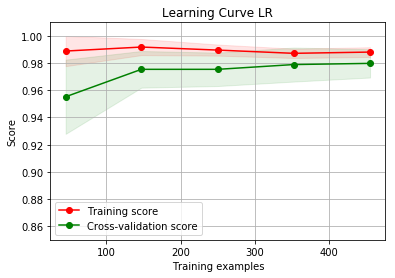

In [11]:
# Plot Learning Curve (LR)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = LogisticRegression()
plot_learning_curve(estimator, 'Learning Curve LR', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

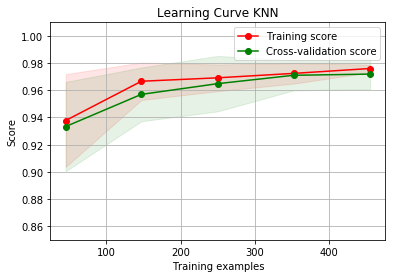

In [15]:
# Plot Learning Curve (KNN)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, 'Learning Curve KNN', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

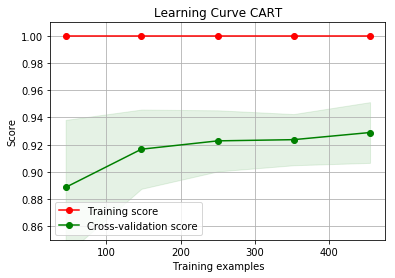

In [16]:
# Plot Learning Curve (CART)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, 'Learning Curve CART', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

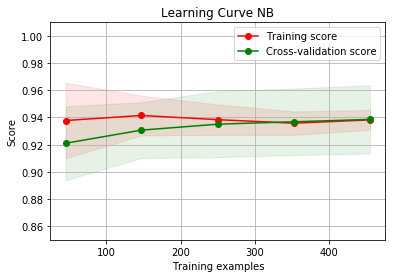

In [19]:
# Plot Learning Curve (NB)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = GaussianNB()
plot_learning_curve(estimator, 'Learning Curve NB', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

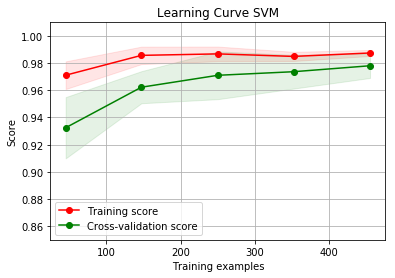

In [20]:
# Plot Learning Curve (SVM)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = SVC()
plot_learning_curve(estimator, 'Learning Curve SVM', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

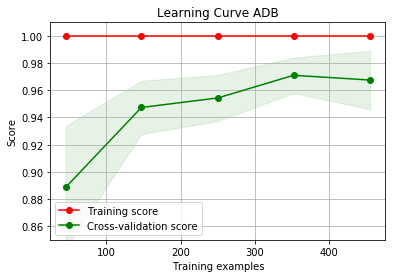

In [21]:
# Plot Learning Curve (ADB)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = AdaBoostClassifier()
plot_learning_curve(estimator, 'Learning Curve ADB', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

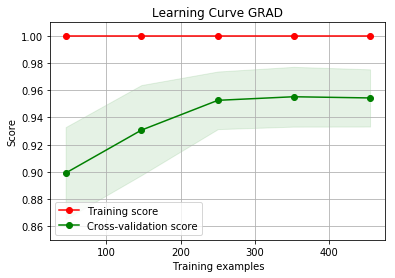

In [22]:
# Plot Learning Curve (GRAD)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, 'Learning Curve GRAD', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

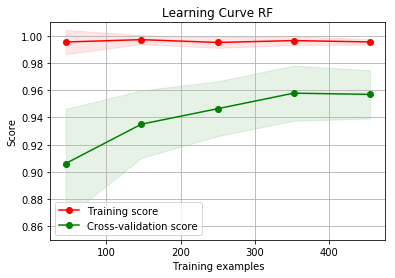

In [23]:
# Plot Learning Curve (RF)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, 'Learning Curve RF', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

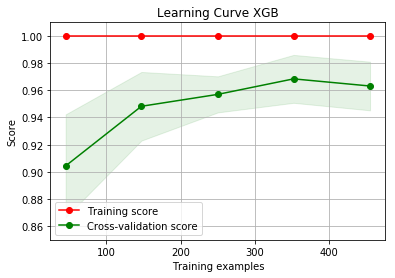

In [24]:
# Plot Learning Curve (XGBoost)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = xgb.XGBClassifier()
plot_learning_curve(estimator, 'Learning Curve XGB', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

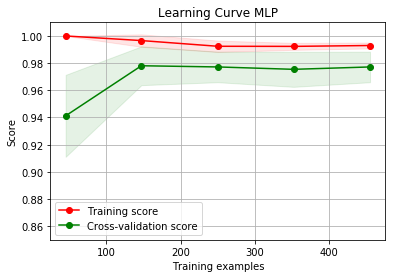

In [25]:
# Plot Learning Curve (MLP)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)

estimator = MLPClassifier()
plot_learning_curve(estimator, 'Learning Curve MLP', rescaledX, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)